In [30]:
import pandas as pd
from sklearn.metrics import roc_auc_score 

In [31]:
pd.options.display.float_format = "{:.4f}".format

In [32]:
data = pd.read_csv("../data/raw/heart_cleveland_upload.csv")

In [55]:
TARGET_COLUMN = "condition"
TRAIN_COLUMNS = list(data.columns)
TRAIN_COLUMNS.remove(TARGET_COLUMN)

In [56]:
data.shape

(297, 14)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [58]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1000,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8000,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6000,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4000,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8000,1,0,0,0


In [59]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000
mean,54.5421,0.6768,2.1582,131.6936,247.3502,0.1448,0.9966,149.5993,0.3266,1.0556,0.6027,0.6768,0.8350,0.4613
std,9.0497,0.4685,0.9649,17.7628,51.9976,0.3525,0.9949,22.9416,0.4698,1.1661,0.6182,0.9390,0.9567,0.4993
min,29.0000,0.0000,0.0000,94.0000,126.0000,0.0000,0.0000,71.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,48.0000,0.0000,2.0000,120.0000,211.0000,0.0000,0.0000,133.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,56.0000,1.0000,2.0000,130.0000,243.0000,0.0000,1.0000,153.0000,0.0000,0.8000,1.0000,0.0000,0.0000,0.0000
75%,61.0000,1.0000,3.0000,140.0000,276.0000,0.0000,2.0000,166.0000,1.0000,1.6000,1.0000,1.0000,2.0000,1.0000
max,77.0000,1.0000,3.0000,200.0000,564.0000,1.0000,2.0000,202.0000,1.0000,6.2000,2.0000,3.0000,2.0000,1.0000


In [60]:
data.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

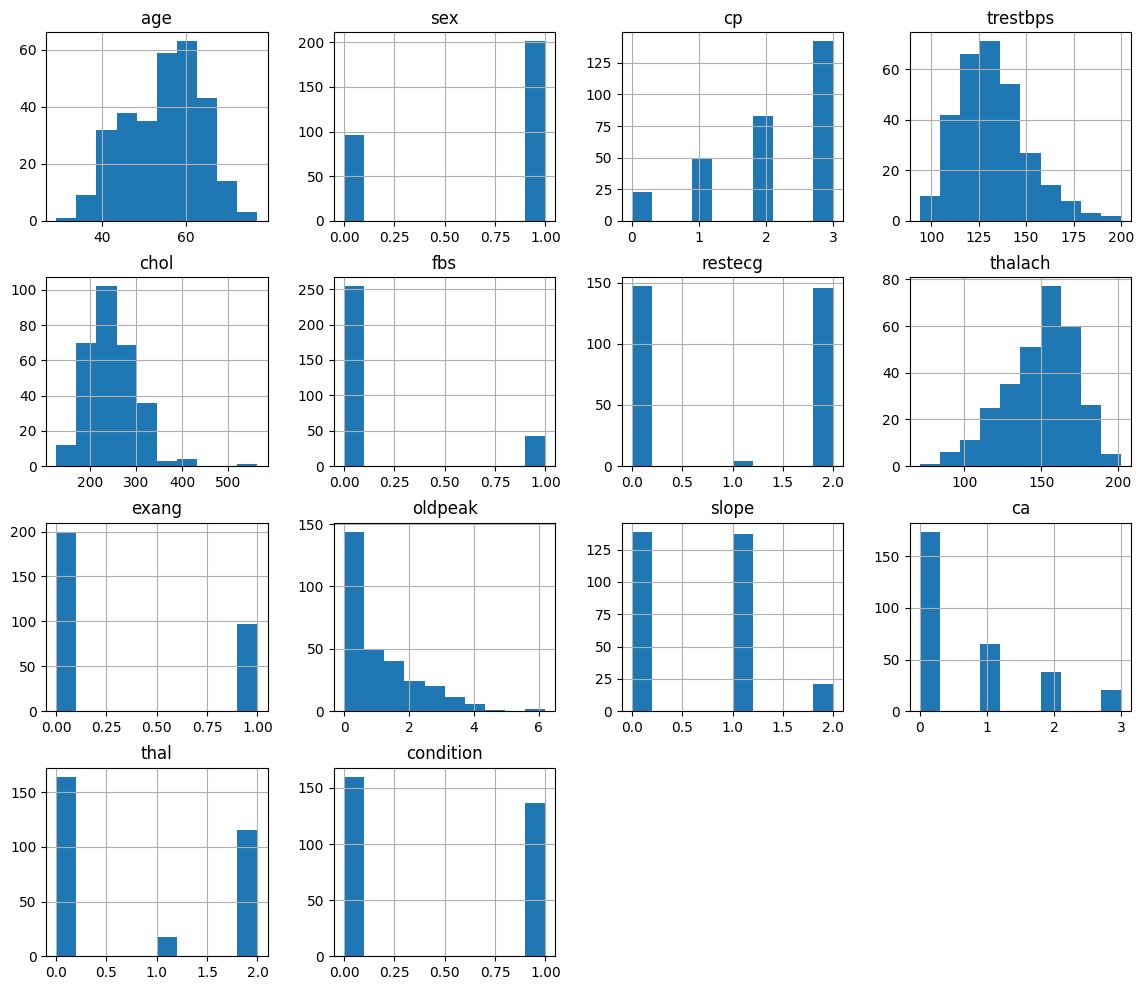

In [61]:
data.hist(figsize=(14, 12));

In [62]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.0000,-0.0924,0.1105,0.2905,0.2026,0.1321,0.1499,-0.3946,0.0965,0.1971,0.1594,0.3622,0.1208,0.2271
sex,-0.0924,1.0000,0.0089,-0.0663,-0.1981,0.0389,0.0339,-0.0605,0.1436,0.1066,0.0333,0.0919,0.3706,0.2785
cp,0.1105,0.0089,1.0000,-0.0370,0.0721,-0.0577,0.0639,-0.3393,0.3775,0.2032,0.1511,0.2356,0.2663,0.4089
trestbps,0.2905,-0.0663,-0.0370,1.0000,0.1315,0.1809,0.1492,-0.0491,0.0667,0.1912,0.1212,0.0980,0.1306,0.1535
chol,0.2026,-0.1981,0.0721,0.1315,1.0000,0.0127,0.1650,-0.0001,0.0593,0.0386,-0.0092,0.1159,0.0234,0.0803
fbs,0.1321,0.0389,-0.0577,0.1809,0.0127,1.0000,0.0688,-0.0078,-0.0009,0.0083,0.0478,0.1521,0.0510,0.0032
restecg,0.1499,0.0339,0.0639,0.1492,0.1650,0.0688,1.0000,-0.0723,0.0819,0.1137,0.1351,0.1290,0.0136,0.1663
thalach,-0.3946,-0.0605,-0.3393,-0.0491,-0.0001,-0.0078,-0.0723,1.0000,-0.3844,-0.3476,-0.3893,-0.2687,-0.2584,-0.4238
exang,0.0965,0.1436,0.3775,0.0667,0.0593,-0.0009,0.0819,-0.3844,1.0000,0.2893,0.2506,0.1482,0.3233,0.4214
oldpeak,0.1971,0.1066,0.2032,0.1912,0.0386,0.0083,0.1137,-0.3476,0.2893,1.0000,0.5790,0.2945,0.3368,0.4241


In [64]:
data[TRAIN_COLUMNS].apply(lambda x: roc_auc_score(data[TARGET_COLUMN], x)).sort_values()

thalach    0.2519
fbs        0.5011
chol       0.5670
trestbps   0.5761
restecg    0.5840
sex        0.6306
age        0.6388
slope      0.6854
exang      0.6982
oldpeak    0.7339
cp         0.7502
ca         0.7524
thal       0.7665
dtype: float64